In [7]:
#http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_BMI_Regression#Data_Table    data source
#https://rstudio-pubs-static.s3.amazonaws.com/65314_c0d1e5696cdd4e93a3784ea67f9e3d34.html refrence

# BMI < 18.5 : underweight,
# 18.5 < BMI < 25 : optimal weight,
# 25 < BMI < 30 : overweight,
# BMI > 30 : obese.
#                            class
# essential fat : 2-5%   --->  0
# athletes : 6-13%       --->  1
# fitness : 14-17%       --->  2
# Normal : 18-24%        --->  3
# obese : more than 24%  --->  4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('body-fat-data.csv')
df.head()

,UnderwaterDensity,BodyFatSiriEqu,Age,Height,Weight(kg),NeckCircumf,ChestCircumf,Abdomen2Circumf,HipCircumf,ThighCircumf,KneeCircumf,AnkleCircumf,ExtendBicepsCircumf,ForearmCircumf,WristCircumf
0,1.0708,12.3,23,172.085,69.96662,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,183.515,78.58488,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,168.275,69.85322,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,183.515,83.80119,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,180.975,83.57439,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X=pd.concat([df.iloc[:,2:], df.iloc[:,0:1]], axis=1)
print(X.head(3))
Y=df['BodyFatSiriEqu']
print(Y.head(3))

# #Selecting top 5 features for training
X = SelectKBest(f_regression, k=5).fit_transform(X, Y)
print(X[0])

   Age   Height  Weight(kg)  NeckCircumf  ChestCircumf  Abdomen2Circumf  \
0   23  172.085    69.96662         36.2          93.1             85.2   
1   22  183.515    78.58488         38.5          93.6             83.0   
2   22  168.275    69.85322         34.0          95.8             87.9   

   HipCircumf  ThighCircumf  KneeCircumf  AnkleCircumf  ExtendBicepsCircumf  \
0        94.5          59.0         37.3          21.9                 32.0   
1        98.7          58.7         37.3          23.4                 30.5   
2        99.2          59.6         38.9          24.0                 28.8   

   ForearmCircumf  WristCircumf  UnderwaterDensity  
0            27.4          17.1             1.0708  
1            28.9          18.2             1.0853  
2            25.2          16.6             1.0414  
0    12.3
1     6.1
2    25.3
Name: BodyFatSiriEqu, dtype: float64
[69.96662 93.1     85.2     94.5      1.0708 ]


In [10]:
#converting np array to pd dataframe
X = pd.DataFrame(X, columns = ['Weight(kg)', 'ChestCircumf', 'Abdomen2Circumf','HipCircumf','UnderwaterDensity'])
print(type(X))
X.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Weight(kg)', 'ChestCircumf', 'Abdomen2Circumf', 'HipCircumf',
       'UnderwaterDensity'],
      dtype='object')

In [5]:
# #scaling the input
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# X = scaler.fit_transform(X)
# print(type(X))

<class 'numpy.ndarray'>


In [11]:
#converting np array to pd dataframe
X = pd.DataFrame(X, columns = ['Weight(kg)', 'ChestCircumf', 'Abdomen2Circumf', 'HipCircumf',
       'UnderwaterDensity'])
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,Weight(kg),ChestCircumf,Abdomen2Circumf,HipCircumf,UnderwaterDensity
0,69.96662,93.1,85.2,94.5,1.0708
1,78.58488,93.6,83.0,98.7,1.0853
2,69.85322,95.8,87.9,99.2,1.0414
3,83.80119,101.8,86.4,101.2,1.0751
4,83.57439,97.3,100.0,101.9,1.0340


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Feature: 0, Score: -0.01397
Feature: 1, Score: 0.06147
Feature: 2, Score: 0.04438
Feature: 3, Score: -0.00829
Feature: 4, Score: -405.99897


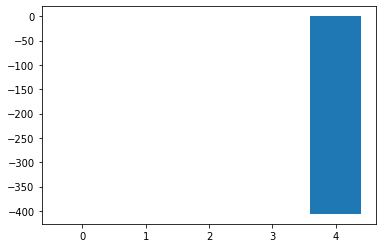

In [14]:
# get importance
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [15]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(X_test,Y_test)

0.9879885360785259

In [16]:
predictions=regr.predict(X_test)
predictions

array([12.02163992, 26.65509743,  3.3341677 , 20.34589893,  9.27056691,
       23.0967775 , 24.84918883, 25.01361066, 25.94278421, 27.06870761,
       25.86826057, 15.68631964, 21.26790045, 21.18586354, 16.50555884,
       12.99074061, 17.192295  ,  0.82543775, 10.54335445, 11.85424377,
       20.8814275 , 13.86798763, 29.49702469, 21.92204636, 19.55397257,
       31.88072254,  4.64687258, 23.12960836, 21.5895969 , 28.07443512,
       30.34379043, 26.43091647, 28.23214381, 11.82416837, 35.88614309,
       13.95760529, 24.66649423, 21.36759184, 14.74705386, 11.26547173,
       17.84039348, 20.86385476, 35.10489128, 22.39110088, 20.65203182,
       14.96935703, 12.53489219,  7.39225649, 31.59806873, -4.35285817,
        8.76191894, 13.4888523 , 22.36432946,  8.60393768, 24.74346583,
       13.01671313, 17.28213067, 16.63661929, 27.10000053, 20.93083253,
        9.57736404, 11.89058632, 12.90902545, 14.17485736, 15.08005792,
       15.29745005, 22.02447536, 17.91448329, 30.67468308, 15.38

In [17]:
predictions = np.round(predictions)
print(np.round(predictions))

[12. 27.  3. 20.  9. 23. 25. 25. 26. 27. 26. 16. 21. 21. 17. 13. 17.  1.
 11. 12. 21. 14. 29. 22. 20. 32.  5. 23. 22. 28. 30. 26. 28. 12. 36. 14.
 25. 21. 15. 11. 18. 21. 35. 22. 21. 15. 13.  7. 32. -4.  9. 13. 22.  9.
 25. 13. 17. 17. 27. 21. 10. 12. 13. 14. 15. 15. 22. 18. 31. 15. 31. 19.
  9. 28. 10. 14.]


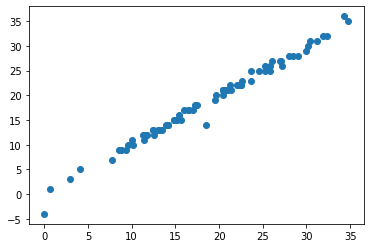

In [18]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)

In [19]:
Y_np=np.array(Y_test)
z=0
for y,p in zip(Y_np,predictions):
    x=abs(y-p)
#     print(x)
    if(x<=2):
        z=z+1
print("Accuracy: {}%".format((z/Y_np.size)*100))

Accuracy: 97.36842105263158%


In [20]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression_fat_detection_model.pkl', 'wb')

# dump information to that file
pickle.dump(regr, file)

In [21]:
import joblib
filename = 'Linear_body_fat_detection_model.sav'
joblib.dump(regr, filename)

['Linear_body_fat_detection_model.sav']

In [82]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [84]:
predictions=reg.predict(X_test)
print(predictions)
predictions=np.round(predictions)

[11.90558909 26.64810672  3.6873282  20.34619085  9.04608804 22.82570186
 24.46337513 24.70065953 26.14811596 27.21526969 25.78038178 15.54870513
 21.32505494 21.06011282 16.69567085 12.9691647  17.05548264  1.16914091
 10.7087532  11.96685099 20.72848355 13.51226329 29.43749181 21.68099578
 19.5503039  31.95917445  4.30040374 23.1692715  21.36024065 27.82811243
 30.27021256 26.14386996 28.6130116  12.01682286 36.00731262 13.80391332
 24.67546432 20.87016883 14.45325699 11.20240986 17.84126379 20.64396707
 35.13018068 22.10484907 20.83011968 14.96891024 12.48374411  7.62992279
 31.57043716 -3.94586884  9.06471795 13.59611864 22.23249997  8.36657886
 24.8753287  13.06075387 17.57975986 16.34422872 27.1241663  21.11185348
  9.13805427 12.11197257 12.91986065 14.01182489 15.40271517 15.22406154
 21.75154379 17.32289769 30.65345013 15.55540926 30.51197881 19.39506588
  8.86685133 27.89394681 10.35799589 13.82410688]


In [85]:
Y_np=np.array(Y_test)
z=0
for y,p in zip(Y_np,predictions):
    x=abs(y-p)
#     print(x)
    if(x<=2):
        z=z+1
print("Accuracy: {}%".format((z/Y_np.size)*100))

Accuracy: 97.36842105263158%


In [86]:
import pickle
# open a file, where you ant to store the data
file = open('SGDRegressor_regression_fat_detection_model.pkl', 'wb')

# dump information to that file
pickle.dump(reg, file)